###### The objective of this program is the following:
1. Extract monthly market data for 10 tickers from Alpha Vantage API
2. Isolate Adjusted Close prices for the 10 stocks 
3. Develop functions that accept prices, sector, date, top/bottom number of prices and return top/bottom industries for that date.

###### Activating code auto-complete

In [2]:
%config IPCompleter.greedy=True

###### Importing Libraries

In [3]:
from alpha_vantage.timeseries import TimeSeries
import time
import pandas as pd
import matplotlib.pyplot as plt

###### Parsing API Key from credentials file

In [4]:
with open("api_key.cred", "r") as cred_file:
    for line in cred_file:
        api_key = line.split("=")[1]

###### Storing List of Tickers and Connecting to the API

In [5]:
# List of companies
list_companies = ['AAPL','MSFT','AMZN','FB','BRK.B','JNJ','GOOG','JPM','V','PG']

# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(api_key, output_format='pandas')


###### Defining Sector for Tickers

In [6]:
# Sector for each company
dict_sector = {'AAPL':'Technology','MSFT':'Technology', 'AMZN':'Retail',
               'FB':'Technology','BRK.B':'Financial Services','JNJ':'Pharmaceuticals',
               'GOOG':'Technology','JPM':'Financial Services','V':'Financial Services',
                'PG':'Industrial'}

sector_data = []
for k,v in dict_sector.items():
    sector_data.append(v)
    
s_sector = pd.Series(data = sector_data, index = list_companies)
s_sector
    

AAPL             Technology
MSFT             Technology
AMZN                 Retail
FB               Technology
BRK.B    Financial Services
JNJ         Pharmaceuticals
GOOG             Technology
JPM      Financial Services
V        Financial Services
PG               Industrial
dtype: object

###### Extracting Data for each Ticker from API

We are interested in the adjust close price for these stocks, so that is what we try to extract using the API. We use adjust close prices for the following reason - 
The adjusted closing price analyzes the stock's dividends, stock splits and new stock offerings to determine an adjusted value. The adjusted closing price reflects the change in stock value caused by new offerings from the corporation. New offerings are when a corporation may choose to offer additional shares of stock, which is often done to raise additional money.

In [7]:
data, metadata = ts.get_monthly_adjusted(symbol='SPY')
data

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
date,,,,,,,
2020-04-20,247.9800,287.3000,243.9000,281.5900,281.5900,1.965467e+09,0.0000
2020-03-31,298.2100,313.8400,218.2600,257.7500,257.7500,5.888711e+09,1.4056
2020-02-28,323.3500,339.0800,285.5400,296.2600,294.4511,2.099672e+09,0.0000
2020-01-31,323.5400,332.9500,320.3600,321.7300,319.7656,1.389179e+09,0.0000
2019-12-31,314.5900,323.8000,307.1300,321.8600,319.8948,1.281221e+09,1.5700
...,...,...,...,...,...,...,...
2000-09-29,153.2500,153.5937,142.1250,143.6250,98.8470,1.132030e+08,0.3753
2000-08-31,143.6250,153.0937,142.6250,152.3437,104.5787,1.023655e+08,0.0000
2000-07-31,145.4375,151.9843,141.5156,143.0000,98.1645,1.067801e+08,0.0000


We create an empty python list in which we want to store stock data for each symbol, when returned by the API. 
For each symbol in list_companies, we call for the monthly adjusted data, isolate just the adjusted close price, rename the column to the symbol of the stock and then append that data into the blank list that we created earlier. 
As per our API limitations, we can only query it 5 times in a minute, we put a sleep timer for 13 seconds after each API call, ensuring that we don't exceed call limits. By the time this loop completes, df_list will contain returned data for each of the stocks in companies_list. 

In [8]:
df_list = []
for company in list_companies:
    data, metadata = ts.get_monthly_adjusted(symbol=company)
    data = pd.DataFrame(data['5. adjusted close'])
    data.rename(columns = {'5. adjusted close':company}, inplace = True)
    df_list.append(data)
#     print(df_list)
    time.sleep(13)
    

###### Concatenating Ticker Outputs to form final DataFrame

In [9]:
df_prices = pd.concat(df_list,axis=1,sort=True)
df_prices
# for i in df_prices.index:
#     print(i)

,AAPL,MSFT,AMZN,FB,BRK.B,JNJ,GOOG,JPM,V,PG
date,,,,,,,,,,
2000-05-31,2.6037,20.1132,49.94,NaN,37.72,27.0117,NaN,26.7610,NaN,19.6317
2000-06-30,3.2472,25.7202,36.31,NaN,35.20,30.7540,NaN,24.7545,NaN,16.7534
2000-07-31,3.1499,22.4441,30.13,NaN,36.50,28.0861,NaN,26.9501,NaN,16.9268
2000-08-31,3.7779,22.4441,41.50,NaN,38.26,27.8462,NaN,30.2343,NaN,18.3611
2000-09-29,1.5963,19.3898,38.44,NaN,41.40,28.4458,NaN,25.5515,NaN,19.8964
...,...,...,...,...,...,...,...,...,...,...
2019-12-31,292.9452,157.2717,1847.84,205.25,226.50,144.9264,1337.02,137.0316,187.6286,124.1591
2020-01-31,308.7671,169.7677,2008.72,201.91,224.43,147.9070,1434.23,130.9577,198.6826,124.6200
2020-02-28,273.3600,162.0100,1883.75,192.47,206.34,134.4800,1339.33,114.8799,181.7600,113.2300


###### Viewing subsets of the data

In [13]:
df_prices.loc['2020-01-01':'2020-04-20']

,AAPL,MSFT,AMZN,FB,BRK.B,JNJ,GOOG,JPM,V,PG
date,,,,,,,,,,
2016-04-29,87.8477,46.1921,659.59,117.58,145.48,100.7026,693.01,56.7474,75.1822,71.4030
2016-05-31,94.1551,49.4412,722.79,118.81,140.54,101.9698,735.72,58.6061,76.9761,72.2230
2016-06-30,90.1385,47.7341,715.62,114.28,144.79,109.7608,692.10,55.8046,72.3248,75.4580
2016-07-29,98.2566,52.8741,758.81,123.94,144.27,113.3169,768.79,57.8888,76.1083,76.8765
2016-08-31,100.5772,53.9376,769.16,126.12,150.49,108.7076,767.05,61.0833,79.0240,78.4214
2016-09-30,107.1655,54.0691,837.31,128.27,144.47,107.6054,777.29,60.2598,80.7822,80.6130
2016-10-31,107.6300,56.2468,789.82,130.99,144.30,105.6561,784.54,63.1277,80.5966,78.5735
2016-11-30,105.3109,56.9407,750.57,118.42,157.44,102.0870,758.04,73.0717,75.6826,74.6448
2016-12-30,110.3611,58.7172,749.87,115.05,162.98,105.6734,771.82,78.6498,76.3678,76.1113


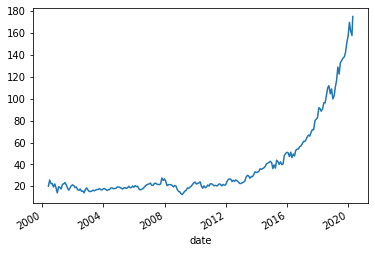

In [21]:
df_prices['MSFT'].plot()

###### Testing lookups against sector series [DEV]

In [78]:
# close prices for all tickers on given date
# pd.DataFrame(df_prices.loc['2019-10-31'])

# tickers with highest 2 close prices
# list(df_prices.loc['2009-12-31'].nlargest(2).index)
# list(df_prices.loc['2009-12-31'].nsmallest(2).index)


# looking up against sector series
# list(s_sector.loc[list(df_prices.loc['2019-10-31'].nlargest(2).index)])

['V', 'MSFT']

###### Defining Function to find top performing companies and sectors for given date

In [89]:
def date_top_industries(prices, sector, date, top_n):
    """
    Get the set of the top industries for the date
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    sector : Series
        Sector name for each ticker
    date : Date
        Date to get the top performers
    top_n : int
        Number of top performers to get
    
    Returns
    -------
    top_industries : set
        Top industries for the date
    top_n_tickers : set
        Symbols of top performers
    """
    # TODO: Implement Function
    close_prices = prices.loc[date]
    top_n_tickers = list(close_prices.nlargest(top_n).index)
    sector_lookup = sector.loc[top_n_tickers]
    
    return set(sector_lookup), set(top_n_tickers)

###### Defining Function to find bottom performing companies and sectors for given date

In [90]:
def date_bottom_industries(prices, sector, date, bottom_n):
    """
    Get the set of the top industries for the date
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    sector : Series
        Sector name for each ticker
    date : Date
        Date to get the top performers
    bottom_n : int
        Number of bottom performers to get
    
    Returns
    -------
    bottom_industries : set
        Bottom industries for the date
    bottom_n_tickers : set
        Symbols of bottom performers
    """
    # TODO: Implement Function
    close_prices = prices.loc[date]
    bottom_n_tickers = list(close_prices.nsmallest(bottom_n).index)
    sector_lookup = sector.loc[bottom_n_tickers]
    
    return set(sector_lookup), set(bottom_n_tickers)

###### Calling Functions

In [91]:
date_top_industries(df_prices, s_sector, '2009-12-31', 2)

({'Financial Services', 'Retail'}, {'AMZN', 'BRK.B'})

In [92]:
date_bottom_industries(df_prices, s_sector, '2009-12-31', 3)

({'Financial Services', 'Technology'}, {'AAPL', 'MSFT', 'V'})